<a href="https://colab.research.google.com/github/pratikbariya/Sign-Language-Digits-Recognition-Using-CNN/blob/main/sign_language_digits_dataset(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# required installations

!git clone https://github.com/ardamavi/Sign-Language-Digits-Dataset.git

fatal: destination path 'Sign-Language-Digits-Dataset' already exists and is not an empty directory.


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from subprocess import check_output
import cv2

# check folder structure
print(check_output(["ls", "../content/"]).decode("utf8"))

# check files in dataset
import os
print(os.listdir('/content/Sign-Language-Digits-Dataset/'))

sample_data
Sign-Language-Digits-Dataset

['README.md', 'Examples', 'Dataset', 'LICENSE', '.git']


In [16]:
# Load the data set
import keras
from keras.preprocessing.image import load_img

# The path for the dataset
dataset_path = "Sign-Language-Digits-Dataset/Dataset"

# Define image size and labels
img_size = (64, 64)  # Resize images to a fixed size

# Prepare lists to hold images and labels
images = []
labels = []

# Load the dataset (assuming the folder names are the labels)
for label in range(10):  # For digits 0-9
    folder_path = os.path.join(dataset_path, str(label))
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = load_img(img_path, target_size=img_size, color_mode="grayscale")  # Load image as grayscale
        images.append(img)
        labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

In [17]:
print(images.shape)
print(labels.shape)

(2062, 64, 64)
(2062,)


In [18]:
# create dataset:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

labels = to_categorical(labels, num_classes=10)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Check shapes
print("Train X shape:", X_train.shape)
print("Test X shape:", X_test.shape)
print("Train Y shape:", Y_train.shape)
print("Test Y shape:", Y_test.shape)

# dividing all the values by 255 will convert it to range from 0 to 1
X_train = X_train.reshape(-1, 64, 64, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 64, 64, 1).astype('float32') / 255.0

# data augmentation: it is a technique used to artificially increase
# the size and diversity of a training dataset by creating modified versions of
# existing data.
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)


Train X shape: (1649, 64, 64)
Test X shape: (413, 64, 64)
Train Y shape: (1649, 10)
Test Y shape: (413, 10)


In [19]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

# initialize a sequencial model
model = Sequential([

    # 1st convolutional block
    Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(64, 64, 1), kernel_regularizer=l2(0.001)),

    # Apply batch normalization to stabilize and accelerate training
    BatchNormalization(),

    # Downsample using max pooling
    MaxPooling2D(pool_size=(2, 2)),

    # 2nd convolutional block
    Conv2D(64, kernel_size=(3, 3), activation="relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # 3rd convolutional block
    Conv2D(128, kernel_size=(3, 3), activation="relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # 4th convolutional block
    Conv2D(256, kernel_size=(3, 3), activation="relu", kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output from the convolutional layers
    Flatten(),

    # Fully connected dense layer with L2 regularization
    Dense(256, activation="relu", kernel_regularizer=l2(0.001)),

    # To prevent overfitting
    Dropout(0.3),

    # Output layer with softmax activation for multi-class classification (10 classes)
    Dense(10, activation="softmax")
])


# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Architecture summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 654,730 (2.50 MB)

 Trainable params: 653,770 (2.49 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/70
104/104 ━━━━━━━━━━━━━━━━━━━━ 24s 183ms/step - accuracy: 0.2629 - loss: 3.2612 - val_accuracy: 0.1162 - val_loss: 3.0981 - learning_rate: 1.0000e-04
Epoch 2/70
104/104 ━━━━━━━━━━━━━━━━━━━━ 23s 209ms/step - accuracy: 0.7726 - loss: 1.4337 - val_accuracy: 0.1525 - val_loss: 3.2860 - learning_rate: 1.0000e-04
Epoch 3/70
104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 189ms/step - accuracy: 0.8754 - loss: 1.1124 - val_accuracy: 0.2421 - val_loss: 3.4411 - learning_rate: 1.0000e-04
Epoch 4/70
104/104 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - accuracy: 0.9149 - loss: 0.9886 - val_accuracy: 0.3317 - val_loss: 2.7519 - learning_rate: 1.0000e-04
Epoch 5/70
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 181ms/step - accuracy: 0.9527 - loss: 0.9007 - val_accuracy: 0.6126 - val_loss: 1.8005 - learning_rate: 1.0000e-04
Epoch 6/70
104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 194ms/step - accuracy: 0.9675 - loss: 0.8227 - val_accuracy: 0.8571 - val_loss: 1.1737 - learning_rate: 1.0000e-04
Epoch 7/70
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 17

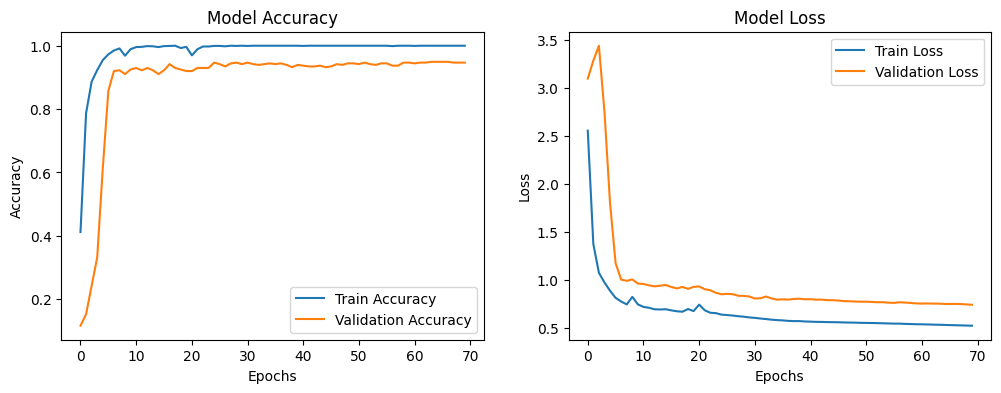

In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# EarlyStopping: Stops training if validation loss doesn't improve for 10 consecutive epochs
# Also restores the weights from the epoch with the best validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6)

# Train the model using training data, with validation on test data
# Apply callbacks to prevent overfitting and adjust learning rate dynamically
history = model.fit(
    X_train, Y_train, batch_size=16,
    validation_data=(X_test, Y_test),
    epochs=70,
    callbacks=[early_stopping, reduce_lr]
)

plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

# Show the plots
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step


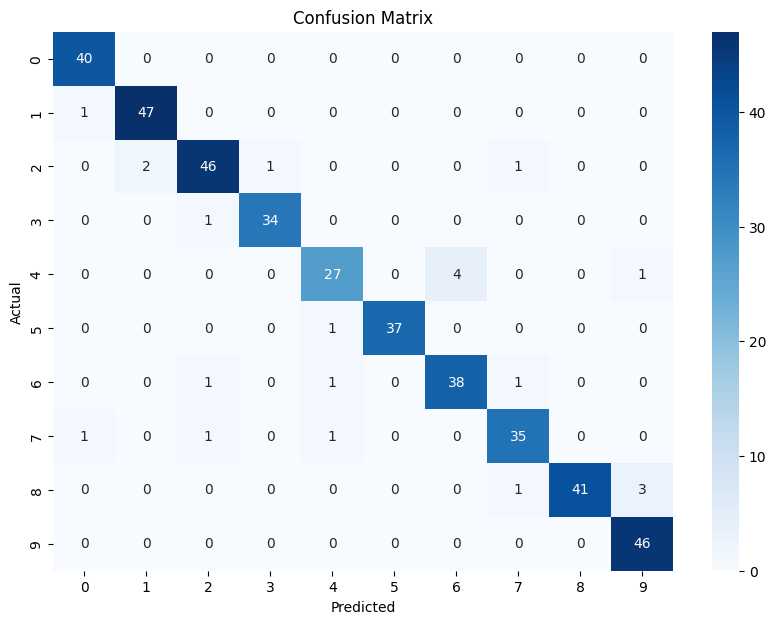

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       0.96      0.98      0.97        48
           2       0.94      0.92      0.93        50
           3       0.97      0.97      0.97        35
           4       0.90      0.84      0.87        32
           5       1.00      0.97      0.99        38
           6       0.90      0.93      0.92        41
           7       0.92      0.92      0.92        38
           8       1.00      0.91      0.95        45
           9       0.92      1.00      0.96        46

    accuracy                           0.95       413
   macro avg       0.95      0.94      0.95       413
weighted avg       0.95      0.95      0.95       413



In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Get index of highest predicted probability
y_pred = model.predict(X_test).argmax(axis=1)

# Convert one-hot encoded labels to class indices
y_true = Y_test.argmax(axis=1)

# Generate the confusion matrix. A confusion matrix is a table used in
# machine learning to evaluate the performance of a classification model by
# comparing its predictions to the actual labels of the data.
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report: precision, recall, f1-score, support for each class.
# precision: Out of all the times the model predicted a class, how many were actually correct.
# recall: Out of all the actual instances of a class, how many did the model correctly predict.
# F1-score: The balance between precision and recall.
# Support: How many actual samples of each class were in the dataset.
print(classification_report(y_true, y_pred))

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9419 - loss: 0.7499
Test accuracy: 0.9467


Random class number: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Min: 0.007843137718737125, Max: 0.9843137264251709, Shape: (1, 64, 64, 1)
Predictions: [[3.4488238e-07 2.4611364e-09 7.5398621e-10 6.5512114e-07 1.5217302e-04
  9.9983275e-01 3.3368954e-07 4.8017100e-06 3.4403516e-07 8.5435231e-06]]


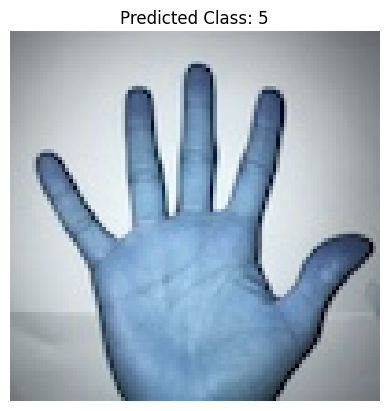

In [55]:
import cv2
from tensorflow.keras.preprocessing import image
import random

# pick random number between 0-9.
i=random.randint(0,9)

print("Random class number:", i)

# your test image path
dataset_path = "/content/Sign-Language-Digits-Dataset/Dataset"

class_path = dataset_path + "/" + str(i)
img_path = random.choice(os.listdir(class_path))
img_path = class_path + "/" + img_path

img = image.load_img(img_path, target_size=(64, 64), color_mode="grayscale")

# Convert the image to an array and normalize it
img_array = image.img_to_array(img) / 255.0  # Normalize the image
img_array = img_array.reshape(1, 64, 64, 1)  # Add batch dimension

# Make a prediction
predictions = model.predict(img_array)

print(f"Min: {img_array.min()}, Max: {img_array.max()}, Shape: {img_array.shape}")
print("Predictions:", predictions)

predicted_class = np.argmax(predictions)

plt.imshow(cv2.imread(img_path))
plt.title(f"Predicted Class: {predicted_class}")
plt.axis("off")
plt.show()

In [46]:
test_loss, test_acc = model.evaluate(X_train, Y_train, verbose=1)
print(f"Test accuracy with train data: {test_acc:.4f}")


test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test accuracy with test data: {test_acc:.4f}")


52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 1.0000 - loss: 0.5201
Test accuracy with train data: 1.0000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9419 - loss: 0.7499
Test accuracy with test data: 0.9467
